## Importing Necessary Libraries ##

In [31]:
import os
from datetime import datetime
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input,Dropout
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras import regularizers
import matplotlib.pyplot as plt
import seaborn as sns

#### Directories for training and test sets ####

In [32]:
train_dir = r"F:\Age&Gender Detector\american-sign-language-recognition\training_set"
test_dir = r"F:\Age&Gender Detector\american-sign-language-recognition\test_set"

#### List classes ####

In [33]:
train_classes = os.listdir(train_dir)
test_classes = os.listdir(test_dir)
train_classes = [cls for cls in train_classes if not cls.startswith('.')]
test_classes = [cls for cls in test_classes if not cls.startswith('.')]

print(f"Classes found in training set: {train_classes}")
print(f"Classes found in test set: {test_classes}")


Classes found in training set: ['1', '10', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'best of luck', 'C', 'D', 'E', 'F', 'fuck you', 'G', 'H', 'I', 'i love you', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'space', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
Classes found in test set: ['1', '10', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'best of luck', 'C', 'D', 'E', 'F', 'fuck you', 'G', 'H', 'I', 'i love you', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'space', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


### Data augmentation for training and test data ###

In [34]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,  
    width_shift_range=0.2,  
    height_shift_range=0.2,  
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'  
)
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

## Using tf.data.Dataset to load and preprocess the data ##

In [35]:

train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    image_size=(64, 64),
    batch_size=32,
    label_mode='categorical',
    shuffle=True,
    validation_split=0.2, 
    subset='training',
    seed=42 
)
validation_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    image_size=(64, 64),
    batch_size=32,
    label_mode='categorical',
    shuffle=True,
    validation_split=0.2,  
    subset='validation',
    seed=42 
)
### Extracting the class name from the dataset
class_names = train_dataset.class_names
num_classes = len(class_names)

print(f"Class names: {class_names}")

Found 60352 files belonging to 40 classes.
Using 48282 files for training.
Found 60352 files belonging to 40 classes.
Using 12070 files for validation.
Class names: ['1', '10', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'best of luck', 'fuck you', 'i love you', 'space']


## Building CNN model ##

In [36]:
model = Sequential([
  Input(shape=(64, 64, 3)),
  Conv2D(32, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)),
  MaxPooling2D(pool_size=(2, 2)),
  Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)),
  MaxPooling2D(pool_size=(2, 2)),
  Conv2D(128, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)),
  MaxPooling2D(pool_size=(2, 2)),
  Dropout(0.2),  # Added Dropout layer with 20% dropout rate
  Flatten(),
  Dense(128, activation='relu'),
  Dense(num_classes, activation='softmax')
])

## Compile model ##

In [37]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

## Model summary ##

In [38]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 29, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         589,952 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 40)                  │           5,160 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 688,360 (2.63 MB)

 Trainable params: 688,360 (2.63 MB)

 Non-trainable params: 0 (0.00 B)

## Time constraint function ##

In [39]:
def within_operating_hours():
    """Check if the current time is within the allowed operational period (6 PM to 10 PM)."""
    current_time = datetime.now().time()
    start_time = datetime.strptime('18:00:00', '%H:%M:%S').time()
    end_time = datetime.strptime('22:00:00', '%H:%M:%S').time()
    return start_time <= current_time <= end_time

## Function to test model on a single image ##

In [40]:
def test_sample_image(model, image_path):
    """Test the model on a single image and display it with the predicted label."""

    #### Defining the class names inside the function
    class_names = ['1', '10', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F',
                   'G', 'H', 'I','J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'best of luck', 'fuck you', 'i love you', 'space']

    #### For visual inspection we will load and display the images
    test_image = image.load_img(image_path, target_size=(64, 64))
    plt.imshow(test_image)
    plt.title("Loaded Image for Debugging")
    plt.axis('off')
    plt.show()

    #### Preprocessing the images
    test_image_array = image.img_to_array(test_image)
    test_image_array = test_image_array / 255.0  # Normalize the image
    test_image_array = np.expand_dims(test_image_array, axis=0)  # Add batch dimension

    #### Debugging and checking the image preprocessing output
    print(f"Preprocessed image shape: {test_image_array.shape}")
    print(f"Preprocessed image data (first pixel): {test_image_array[0][0][0]}")  # Print one pixel for check

    #### Here we will make prediction
    prediction = model.predict(test_image_array)

    #### Debugging and checking the raw preprocessing output
    print(f"Raw prediction values: {prediction}")

    predicted_class = np.argmax(prediction)

    #### Debugging and checking the  predicted class index
    print(f"Predicted class index: {predicted_class}")

    
    if 0 <= predicted_class < len(class_names):
        predicted_label = class_names[predicted_class]
    else:
        predicted_label = 'Unknown'

    print(f"Prediction: {predicted_label}")

    #### Displaying the image with the predicted label 
    plt.imshow(image.load_img(image_path))
    plt.title(f"Predicted: {predicted_label}")
    plt.axis('off')  
    plt.show()


## Training the model ##

In [41]:
history = model.fit(
    train_dataset,  
    epochs=1,
    validation_data=validation_dataset  
)

1509/1509 ━━━━━━━━━━━━━━━━━━━━ 96s 62ms/step - accuracy: 0.8728 - loss: 2.9675 - val_accuracy: 0.9984 - val_loss: 0.1143


## Save the model ##

In [42]:
model.save('Sign_Language_CNN_Model.keras')

## Test the model on some images ##

In [43]:
#Testing whether the images are opening or not
from PIL import Image 
img=Image.open(r"F:\Age&Gender Detector\american-sign-language-recognition\test_set\2\2.png")
img.show()

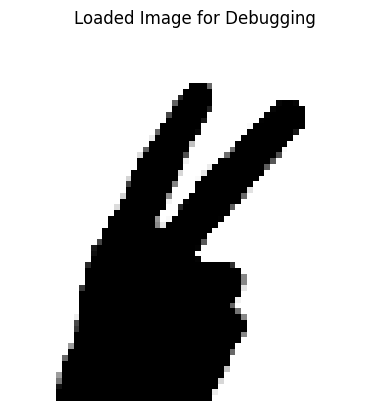

Preprocessed image shape: (1, 64, 64, 3)
Preprocessed image data (first pixel): [1. 1. 1.]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
Raw prediction values: [[0.0253545  0.02454429 0.02888309 0.02500478 0.02410187 0.02439635
  0.02450892 0.02504    0.02613525 0.02493365 0.02399665 0.0251387
  0.0235315  0.02441494 0.02620719 0.02473778 0.02380328 0.02498735
  0.02542674 0.02552342 0.02633802 0.02486786 0.02507005 0.02365336
  0.02425154 0.02443092 0.02473468 0.02572335 0.02596616 0.02305568
  0.02588297 0.02652451 0.02527685 0.02556964 0.02386916 0.0247401
  0.02643579 0.02463128 0.02354399 0.02476394]]
Predicted class index: 2
Prediction: 2


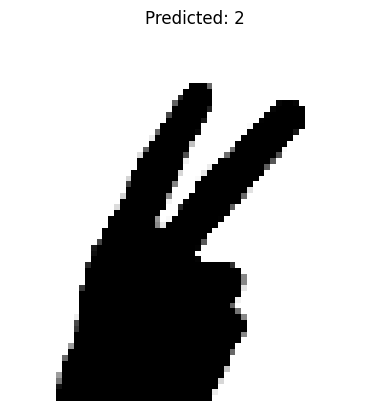

In [44]:
test_sample_image(model, r"F:\Age&Gender Detector\american-sign-language-recognition\test_set\2\2.png")

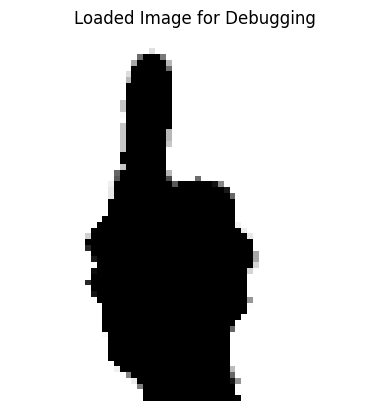

Preprocessed image shape: (1, 64, 64, 3)
Preprocessed image data (first pixel): [1. 1. 1.]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Raw prediction values: [[0.02564429 0.02454005 0.0263205  0.02486231 0.02393802 0.02510435
  0.02419652 0.02421709 0.02573365 0.02568952 0.02381505 0.02550177
  0.02368785 0.02495625 0.02586476 0.02646173 0.02451036 0.02397665
  0.02521514 0.02477049 0.02691749 0.02474291 0.02571056 0.02469708
  0.02509189 0.02326608 0.02425648 0.02587798 0.02595204 0.02561701
  0.02447186 0.02345626 0.02507535 0.02521966 0.02374609 0.02542452
  0.02817979 0.02497101 0.02421533 0.02410422]]
Predicted class index: 36
Prediction: best of luck


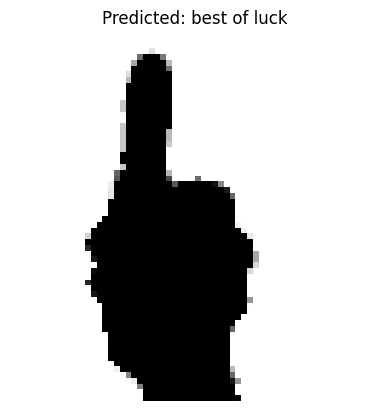

In [45]:
test_sample_image(model, r"F:\Age&Gender Detector\american-sign-language-recognition\test_set\best of luck\2.png")

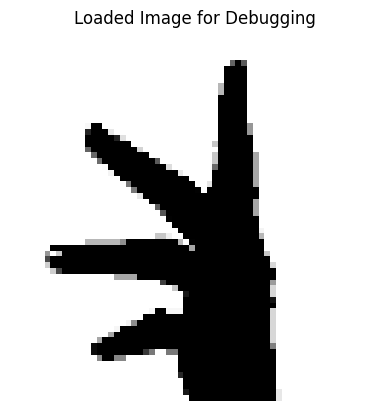

Preprocessed image shape: (1, 64, 64, 3)
Preprocessed image data (first pixel): [1. 1. 1.]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Raw prediction values: [[0.02540664 0.02688411 0.02538387 0.025369   0.02393918 0.02576839
  0.02473648 0.02490132 0.02524979 0.02534112 0.02421597 0.02457606
  0.02391375 0.02423624 0.02594077 0.0250308  0.02509548 0.02432035
  0.02541044 0.02539351 0.02670375 0.02532608 0.024887   0.02549234
  0.02590802 0.02329871 0.02436494 0.02490773 0.02678038 0.02441948
  0.02554949 0.02462339 0.02604584 0.02485948 0.02371767 0.0239925
  0.02505578 0.02411123 0.02523019 0.02361285]]
Predicted class index: 1
Prediction: 10


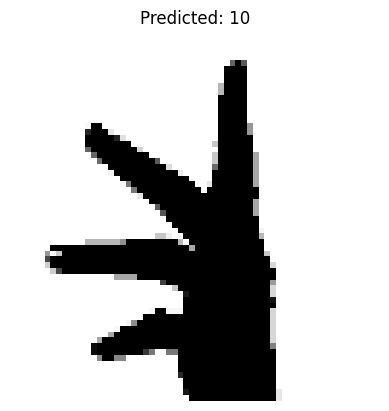

In [46]:
test_sample_image(model, r"F:\Age&Gender Detector\american-sign-language-recognition\test_set\10\9.png")

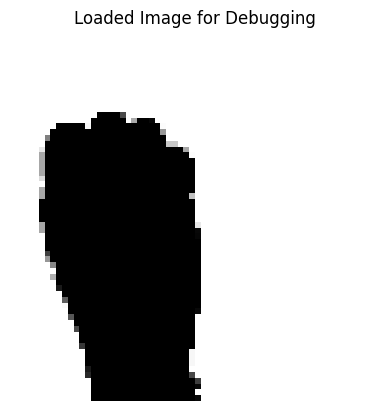

Preprocessed image shape: (1, 64, 64, 3)
Preprocessed image data (first pixel): [1. 1. 1.]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Raw prediction values: [[0.02527929 0.02456211 0.02568407 0.02545965 0.02463281 0.02451807
  0.02535297 0.02412506 0.02492295 0.02471386 0.02385463 0.02442905
  0.02431663 0.02490138 0.0283276  0.02569038 0.02389291 0.02513276
  0.02694732 0.02508266 0.02600362 0.02415716 0.02581131 0.02556552
  0.02506308 0.02463149 0.02355316 0.02525497 0.02628746 0.02501812
  0.02565909 0.02547965 0.02450391 0.02467805 0.02381186 0.02407715
  0.02617994 0.0240289  0.02433472 0.02407462]]
Predicted class index: 14
Prediction: E


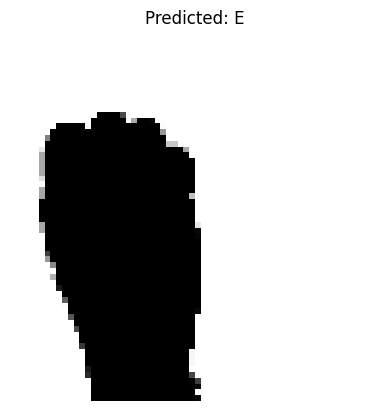

In [47]:
test_sample_image(model, r"F:\Age&Gender Detector\american-sign-language-recognition\test_set\E\10.png")

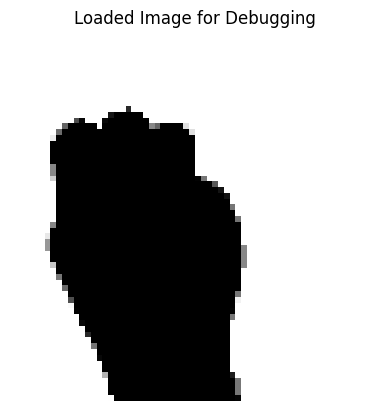

Preprocessed image shape: (1, 64, 64, 3)
Preprocessed image data (first pixel): [1. 1. 1.]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Raw prediction values: [[0.02506534 0.02470313 0.02574086 0.0252789  0.02462588 0.02475357
  0.02498431 0.02440593 0.02482147 0.02495933 0.02408319 0.02448653
  0.02401841 0.02494615 0.02784264 0.02586847 0.02415702 0.02489941
  0.02667737 0.0251819  0.02614873 0.0241275  0.02631531 0.02577416
  0.02518444 0.02418566 0.02361828 0.02513011 0.02644212 0.02539528
  0.02520452 0.02493607 0.02448272 0.0243423  0.02376879 0.02444688
  0.02622325 0.0240274  0.02438478 0.02436182]]
Predicted class index: 14
Prediction: E


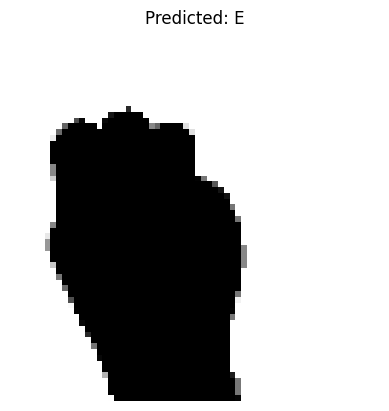

In [48]:
test_sample_image(model, r"F:\Age&Gender Detector\american-sign-language-recognition\test_set\M\18.png")

## Evaluation and metrics (Confusion Matrix, Precision, Recall)

In [49]:
def evaluate_model(model, validation_dataset):
    """Evaluate the model and print classification report with confusion matrix."""
    if within_operating_hours():
        Y_pred = model.predict(validation_dataset)
        y_pred = np.argmax(Y_pred, axis=1)

        ### WE will extract the labels from validation dataset
        y_true = np.concatenate([y for x, y in validation_dataset], axis=0)
        y_true = np.argmax(y_true, axis=1)

        ##### CONFUSION MATRIX 
        cm = confusion_matrix(y_true, y_pred)
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
        plt.title('Confusion Matrix')
        plt.ylabel('True Label')
        plt.xlabel('Predicted Label')
        plt.show()

        #### REPORT OF CLASSIFICATION
        print("Classification Report:")
        print(classification_report(y_true, y_pred, target_names=class_names))
    else:
        print("Evaluation can only be done between 6 PM and 10 PM.")

# Evaluate the model

378/378 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step


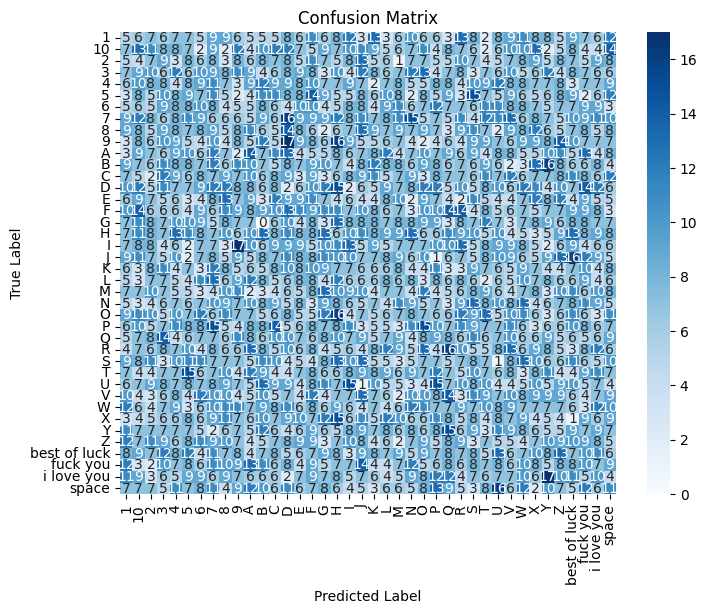

Classification Report:
              precision    recall  f1-score   support

           1       0.02      0.02      0.02       289
          10       0.04      0.04      0.04       307
           2       0.03      0.03      0.03       267
           3       0.02      0.02      0.02       306
           4       0.01      0.01      0.01       303
           5       0.03      0.03      0.03       292
           6       0.03      0.03      0.03       290
           7       0.02      0.02      0.02       350
           8       0.02      0.02      0.02       302
           9       0.03      0.03      0.03       299
           A       0.05      0.05      0.05       304
           B       0.02      0.02      0.02       311
           C       0.03      0.03      0.03       301
           D       0.01      0.01      0.01       341
           E       0.03      0.03      0.03       274
           F       0.03      0.03      0.03       330
           G       0.01      0.01      0.01       298
    

In [50]:
evaluate_model(model, validation_dataset)